In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing dataset
dataset = pd.read_csv('tmdb-movies.csv')
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
dataset.shape

(10866, 21)

In [4]:
dataset.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
dataset.isnull().sum()   #checking null values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#drop null values
dataset.dropna(inplace=True)
dataset.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [7]:
#drop values which not required
col = dataset.drop(['id','popularity','imdb_id','director','keywords','production_companies', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj'],axis = 1)

In [8]:
col = col.dropna()

In [9]:
col.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [10]:
col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          1992 non-null   int64  
 1   revenue         1992 non-null   int64  
 2   original_title  1992 non-null   object 
 3   cast            1992 non-null   object 
 4   runtime         1992 non-null   int64  
 5   genres          1992 non-null   object 
 6   release_date    1992 non-null   object 
 7   vote_count      1992 non-null   int64  
 8   vote_average    1992 non-null   float64
 9   release_year    1992 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 171.2+ KB


In [43]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
#Q.1 Which are the movies with the third-lowest and third-highest budget?
highest_budget_movies = dataset.sort_values('budget', ascending=False).head(20)
highest_budget_movies['budget(million)'] = highest_budget_movies['budget'].apply(lambda x : x//1000000)
lowest_budget_movies = dataset.sort_values('budget', ascending=False).tail(20)
lowest_budget_movies['budget(million)'] = lowest_budget_movies['budget'].apply(lambda x : x//1000000)
max_budget = highest_budget_movies.iloc[2,5]
min_budget = lowest_budget_movies.iloc[0,5]
print('movies with the third-lowest budget: ') 
min_budget

movies with the third-lowest budget: 


'John Dies at the End'

In [12]:
print('movies with the third-highest budget: ')
max_budget

movies with the third-highest budget: 


"Pirates of the Caribbean: At World's End"

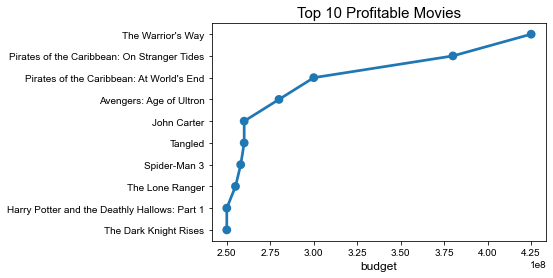

In [13]:
info=pd.DataFrame(col['budget'].sort_values(ascending=False))
info['original_title']=col['original_title']
dat=list(map(str,(info['original_title'])))
x=list(dat[:10])
y=list(info['budget'][:10])
p=sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Top 10 Profitable Movies",fontsize=15)
plt.xlabel("budget",fontsize=12)
sns.set_style('darkgrid')

In [49]:
#Q.3What is the most common Genre for Vin Diesel & Emma Watson movies?

In [50]:
genres_and_count = {}
for i in range(col.shape[0]):
    genres = str(col['genres'].values[i]).split('|')
    for j in genres:
        try:
            count = genres_and_count[j]
            genres_and_count[j] = count + 1
        except:
            genres_and_count[j] = 1
        
genres_and_count

{'Action': 532,
 'Adventure': 361,
 'Science Fiction': 291,
 'Thriller': 575,
 'Fantasy': 202,
 'Crime': 262,
 'Western': 20,
 'Drama': 838,
 'Family': 233,
 'Animation': 170,
 'Comedy': 640,
 'Mystery': 148,
 'War': 44,
 'Romance': 291,
 'History': 56,
 'Horror': 273,
 'Music': 72,
 'Documentary': 93,
 'TV Movie': 16,
 'Foreign': 6}

In [51]:
# print original dictionary 
print (type(genres_and_count))   
# convert dictionary into string 
# using str 
result = str(genres_and_count)  
# print resulting string 
print ("\n", type(result)) 
print ("final string = ", result) 

<class 'dict'>

 <class 'str'>
final string =  {'Action': 532, 'Adventure': 361, 'Science Fiction': 291, 'Thriller': 575, 'Fantasy': 202, 'Crime': 262, 'Western': 20, 'Drama': 838, 'Family': 233, 'Animation': 170, 'Comedy': 640, 'Mystery': 148, 'War': 44, 'Romance': 291, 'History': 56, 'Horror': 273, 'Music': 72, 'Documentary': 93, 'TV Movie': 16, 'Foreign': 6}


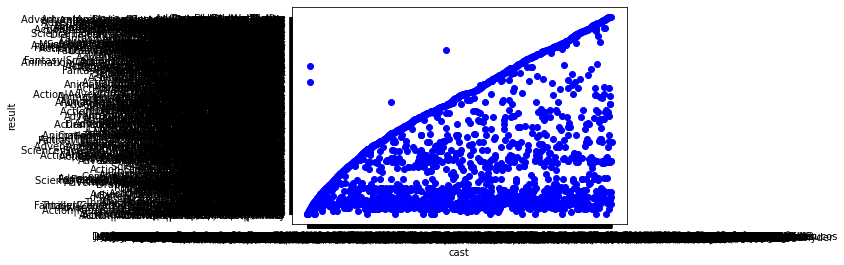

In [41]:
plt.scatter(col.cast, col.genres,  color='blue')
plt.xlabel("cast")
plt.ylabel("result")
plt.show()

Text(0, 0.5, 'cast')

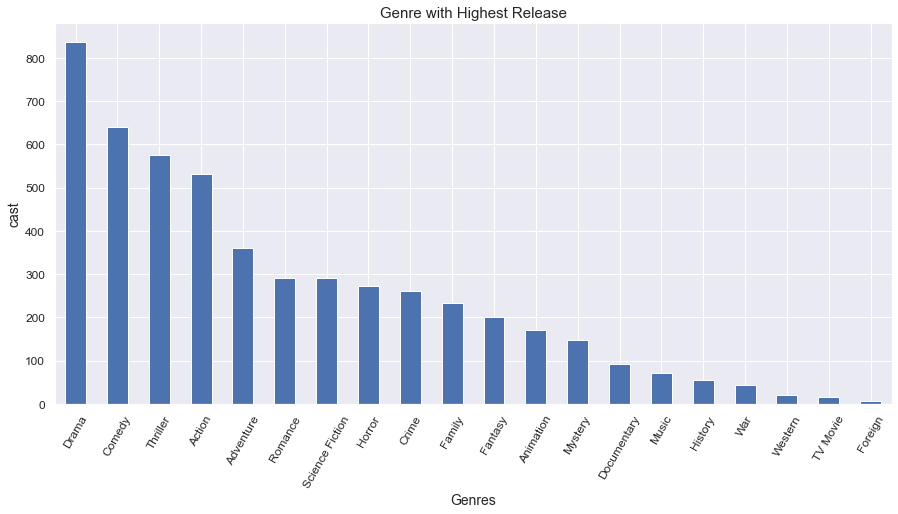

In [73]:
sum_gen=count_genre('genres')
sum_gen.plot(kind='bar',figsize=(15,7),fontsize=12)
plt.xticks(rotation=60)
plt.title("Genre with Highest Release",fontsize=15)
plt.xlabel("Genres",fontsize=14)
plt.ylabel("cast",fontsize=14)

In [56]:
#Q.4) Which are the movies with the most and least earned revenue?

In [57]:
most_earned_revenue=col.sort_values('revenue', ascending = False)
most_earned_revenue

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
5231,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997
4361,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
...,...,...,...,...,...,...,...,...,...,...
3657,135000,0,The Tunnel,Bel DeliÃ¡|Steve Davis|Luke Arnold|Andy Rodore...,90,Horror|Thriller|Mystery,5/19/11,49,5.3,2011
3655,0,0,Private Romeo,Hale Appleman|Charlie Barnett|Barry Adamson|Ch...,99,Drama|Romance,6/20/11,11,4.3,2011
5404,0,0,Wild America,Jonathan Taylor Thomas|Scott Bairstow|Devon Sa...,106,Family,7/2/97,12,6.2,1997
1859,0,0,Heartless,Jim Sturgess|Noel Clarke|Eddie Marsan|Luke Tre...,114,Drama|Horror|Thriller,11/21/09,36,6.1,2009


In [58]:
most_revenue = most_earned_revenue[0:1]
most_revenue

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009


In [59]:
least_earned_revenue=col.sort_values('revenue', ascending = True)
least_earned_revenue

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
2197,0,0,Altitude,Jessica Lowndes|Julianna Guill|Ryan Donowho|La...,90,Horror|Action|Thriller|Science Fiction,10/10/10,36,4.8,2010
2141,3500000,0,Superman/Batman: Apocalypse,Summer Glau|Ed Asner|Tim Daly|Andre Braugher|K...,78,Animation|Action|Adventure,9/28/10,95,7.0,2010
2145,5800000,0,Burning Palms,Zoe Saldana|Jamie Chung|Rosamund Pike|Lake Bel...,112,Comedy|Drama|Family,4/23/10,11,5.5,2010
2150,1400000,0,My Girlfriend's Boyfriend,Alyssa Milano|Christopher Gorham|Michael Lande...,84,Comedy|Romance,4/22/10,31,6.0,2010
2159,500000,0,YellowBrickRoad,Michael Laurino|Anessa Ramsey|Alex Draper|Cass...,99,Horror|Thriller,1/23/10,22,5.0,2010
...,...,...,...,...,...,...,...,...,...,...
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
4361,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012
5231,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015


In [60]:
least_revenue = least_earned_revenue[0:1]
least_revenue

,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
2197,0,0,Altitude,Jessica Lowndes|Julianna Guill|Ryan Donowho|La...,90,Horror|Action|Thriller|Science Fiction,10/10/10,36,4.8,2010


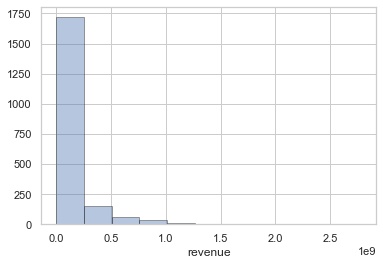

In [61]:
sns.distplot(col['revenue'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))

In [62]:
#Q 5.What is the average runtime of movies in the year 2006?

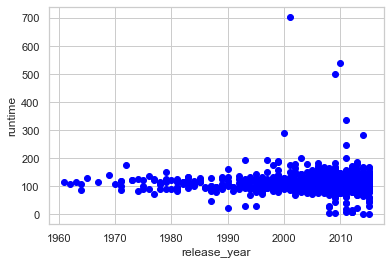

In [63]:
plt.scatter(col.release_year, col.runtime,  color='blue') #scatter plot
plt.xlabel("release_year")
plt.ylabel("runtime")
plt.show()

Text(0, 0.5, 'Average Runtime (in minutes)')

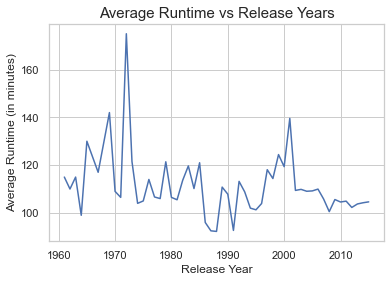

In [67]:
col.groupby('release_year')['runtime'].mean().plot()  #using groupby
plt.title('Average Runtime vs Release Years',fontsize=15)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Average Runtime (in minutes)',fontsize=12,rotation=90)

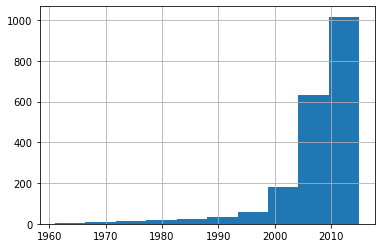

In [18]:
col.release_year.hist() #histogram